# Numpy: Numerical Python

In [2]:
import numpy as np

## Why Numpy?

Compared with a Python array, a NumPy array is a contiguous piece of memory
that is passed directly to LAPACK, which is a software library for numerical linear
algebra under the hood, so that matrix manipulation is very fast in Python. An
array in NumPy is like a matrix in MATLAB. Unlike lists in Python, an array should
contain the same data type, as shown in the following line of code:

In [3]:
x = np.array([100, 0.1, 2], float)
print(x)
print(type(x))

[100.    0.1   2. ]
<class 'numpy.ndarray'>


This is equivalent to:

In [4]:
x = [1, 3, 5, 7, 9]
y = np.array(x)
print(y)
y = np.array(x, dtype=float)
print(y)

[1 3 5 7 9]
[1. 3. 5. 7. 9.]


In the previous example, dtype is the keyword specifying the data type. For a list,
different data types could coexist without causing any problems. However, when
converting a list containing different data types into an array, an error message will
appear.

In [5]:
x = np.array([1, 2, 3, True, "False"])
print(x)


['1' '2' '3' 'True' 'False']


In [6]:
y = np.array(x, dtype=float)
print(y)

ValueError: ignored

There are many functions included in Numpy:

In [ ]:
x = np.array(dir(np))
print(f"There are {len(x)} functions in Numpy")

There are 620 functions in Numpy


In [ ]:
print(help(np.std))

In [ ]:
print(np.random.seed)
print(help(np.random.normal))

In [ ]:
print(help(np.pv))
print(help(np.fv))
print(help(np.pmt))

## Creating Arrays

| Function Name | Type of Array |
| ------------- |  -----------  |
| np.array | Creates an array for which the elements are given by an array-like object |
| np.zeros | Creates an array for which the elements are given by an array-like object | 
| np.ones | Creates an array with the specified dimensions and data type that is filled with ones. |
| np.diag | Creates a diagonal array with specified values along the diagonal and zeros elsewhere. |
| np. arange | Creates an array with evenly spaced values between the specified start, end, and increment values.|
| np.linspace | Creates an array with evenly spaced values between specified start and end values, using a specified number of elements.|



In numerical computing it is very common to require arrays with evenly spaced values between a starting value and ending value. NumPy provides two similar functions to create such arrays: `np.arange` and `np.linspace`. Both functions take three arguments, where the first two arguments are the start and end values. The third argument of np.arange is the increment, while for np.linspace it is the total number of points in the array. 

Create an array filled with a linear sequence
Starting at 0, ending at 20, stepping by 2
(this is similar to the built-in range() function)

In [17]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

Numbers from 0 to 5 (included), by 0.5

In [21]:
np.arange(0, 5.1, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [19]:
np.linspace(0,5,11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

How about matrices?

In [25]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [26]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

In [27]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [48]:
v = np.linspace(0, 0.5, 9)
print(v)
print(v.shape)
M = v.reshape(3,3)
print(M)
print(M.shape)


[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5   ]
(9,)
[[0.     0.0625 0.125 ]
 [0.1875 0.25   0.3125]
 [0.375  0.4375 0.5   ]]
(3, 3)


## Indexing and Slicing

Same as lists

In [38]:
M[:,1]

array([0.0625, 0.25  , 0.4375])

In [40]:
M[0,:]

array([0.    , 0.0625, 0.125 ])

In [41]:
M[1,2]

0.3125

In [43]:
M[0:, 2:]

array([[0.125 ],
       [0.3125],
       [0.5   ]])

In [44]:
M[-1,:]

array([0.375 , 0.4375, 0.5   ])

### Views and Copies

In [45]:
print(M)

[[0.     0.0625 0.125 ]
 [0.1875 0.25   0.3125]
 [0.375  0.4375 0.5   ]]


In [46]:
N = M
N[0,:] = 0
print(N)

[[0.     0.     0.    ]
 [0.1875 0.25   0.3125]
 [0.375  0.4375 0.5   ]]


In [47]:
print(M)

[[0.     0.     0.    ]
 [0.1875 0.25   0.3125]
 [0.375  0.4375 0.5   ]]


We should have done

In [50]:
N = M.copy()
N[0,:] = 0
print(N)
print(M)

[[0.     0.     0.    ]
 [0.1875 0.25   0.3125]
 [0.375  0.4375 0.5   ]]
[[0.     0.0625 0.125 ]
 [0.1875 0.25   0.3125]
 [0.375  0.4375 0.5   ]]


#Random Number Generation

## Gaussian Distribution

In [ ]:
import numpy as np

In [ ]:
mu, sigma = 0, 0.1
np.random.seed(123456)
X = np.random.normal(mu, sigma, 1000)

In [ ]:
abs(mu - np.mean(X))

0.004604424576460095

In [ ]:
abs(sigma - np.std(X, ddof=1))

0.004408625100238706

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


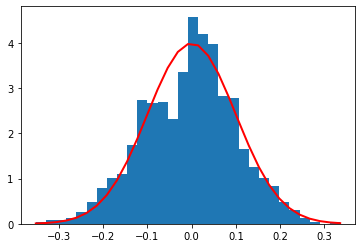

In [ ]:
count, bins, ignored = plt.hist(X, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()


## Random Walk Simulation

What is arandom walk?
It is aprocess $y$ so that
$$
y_t = y_{t-1} + \epsilon_t \\
y_t  -y_{t-1} = \epsilon_t \\
\Delta y_t = \epsilon_t
$$
where $\epsilon_t \sim WN(0, \sigma^2_\epsilon)$. We can express $y_t$ as
$$
y_t = \epsilon_t + \epsilon_{t-1} + \ldots + \epsilon_1 \\
y_t = \sum_{i=1}^t \epsilon_i
$$
so that we can obtain it from the cummulative sum of the values of $\epsilon$. 

This is what we are foing with the code:

In [ ]:
import numpy as np
np.random.seed(123456)

In [ ]:
N = 1000
epsilon = np.random.standard_normal(N)
y = epsilon.cumsum()

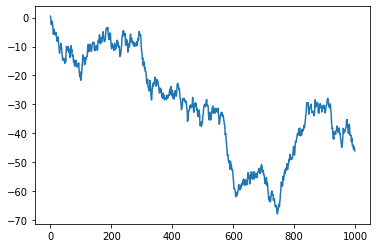

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y)
plt.show()

## $\Pi$ Number Approximation

### Monte Carlo Method

Let's try to approximate the value of $\pi$ using the area of the circle and the square.

The area of the circle is
$$
\pi r^2,
$$
where $r$ is the **radius** of the circle.

Let's assume we have a square of size 1. In this case, the area of the square is is 1. If we draw a semicircle, the area of the semicircle is
$$
A = \dfrac{1}{4} \pi r^2 =  \dfrac{1}{4} \pi
$$
so that
$$
\pi = 4 \times A
$$
How do we calculate the area of the semicircle? We apply a Monte Carlo simulation scheme, finding the probability bthat a point is in the circle:

1.   Draw $x$, $y$, as $U(0,1)$
2.   If $x^2 + y^2 \leq 1$ then we add 1 to a $counter$
3.   Repeat steps 1-2 $N$ times
4.   Calculate $A$ as $A=\dfrac{counter}{N}$.
5.   $\pi \approxeq 4 \times A$




In [ ]:
import numpy as np



In [ ]:
np.random.seed(1234)
counter = 0
N = 100000
for i in range(0,N):
  x = np.random.uniform(0,1)**2
  y = np.random.uniform(0,1)**2
  if x+y <= 1:
    counter+=1

A = float(counter)/float(N)
mypi = 4.0*A 

print(f"The counter {counter}")
print(f"The Area {A}")
print(f"Pi {mypi}")

The counter 78714
The Area 0.78714
Pi 3.14856


My approximation is 

In [ ]:
print(f"My approximation to Pi is {mypi}")

My approximation to Pi is 3.14856


How good is my approximation to $\pi$?

In [ ]:
import math
print(f"Pi is {math.pi}")

Pi is 3.141592653589793


### Leibniz's Formula

Let's make it more interesting by using the Leibniz's formula:
$$
\pi = \dfrac{4}{1} - \dfrac{4}{3} + \dfrac{4}{5} - \dfrac{4}{7} + \dfrac{4}{9} - \dfrac{4}{11} + \ldots - \dfrac{4}{N}
$$
where $N$ is a large and even number. In fact, the formula is 
$$
\pi = \sum_{i=0}^{\infty}
\dfrac{4 (-1)^i}{2i+1}
$$
The code is easy to understand:

In [ ]:
mypi=0
N = 100000

for i in range(0,N):
  mypi+= ((4.0 * (-1)**i) / (2*i + 1))

print(mypi)

3.1415826535897198


## Black-Scholes-Merton (BSM) Option Pricing

We will consider a Black-Scholes-
Merton (BSM) setup in which the option’s underlying risk factor
follows a geometric Brownian motion.
Suppose we have the following numerical parameter values for the valuation:



*   Initial stock index level $S_0 = 100$
*   Strike price of the European call option $K = 105$
*   Time-to-maturity $T = 1$ year
*   Constant, riskless short rate $r = 5\%$
*   Constant volatility = 20%

In the BSM model, the index level at maturity is a random variable, given by the following equation, 
with $z$ being a standard normally distributed random variable

$$
S_T = S_0 \exp \left[ \left( r - 0.5 \sigma^2  \right) T + \sigma \sqrt{T} z \right]
$$

The following is an algorithmic description of the Monte Carlo valuation procedure:



1.   Draw N (pseudo)random numbers $z(i)$, $i \in {1, 2, …, N}$, from the standard normal
distribution.
2.   Calculate all resulting index levels at maturity $S_T(i)$ for given $z(i)$ and the equation above.
3.   Calculate all inner values of the option at maturity as $h_T(i) = \max \left(S_T(i) – K,0 \right)$.
4.   Estimate the option present value via the Monte Carlo estimator given in
$$
C_0 = e^{-rT}  \dfrac{1}{N} \sum_{i=1}^{N}
 h_T(i)$$

 Notice that
 $$
\dfrac{1}{N} \sum_{i=1}^{N}
 h_T(i) = \bar{h}
 $$

The code:

Naive version:

To create an array of specific size and data type, but without initializing the elements in the array to any particular values, we can use the function `np.empty`. The advantage of using this function, for example, instead of `np.zeros`, which creates an array initialized with zero-valued elements, is that we can avoid the initiation step. If all elements are guaranteed to be initialized later in the code, this can save a little bit of time, especially when working with large arrays. 

In [23]:
#Parameters
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2
import numpy as np
np.random.seed(123456)
N = 10000
hT = np.empty(N)
for i in range(0,N):
  z = np.random.standard_normal(1)
  ST = S0 + np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
  hT[i] = np.maximum(ST - K, 0)

C0 = np.exp(-r * T) * np.mean(hT)
print(f"Value of the European call option: {C0}")

Value of the European call option: 0.0


Now we repeat the process, but ew use **vectorisation**. z will be a vector of random variables, so we do no have to create teh hT array and the loop is no longer necessary.

In [16]:
#Parameters
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2
import numpy as np
np.random.seed(123456)
N = 10000
z=np.random.standard_normal(N)
ST = S0 + np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
hT = np.maximum(ST - K, 0)
C0 = np.exp(-r * T) * np.mean(hT)
# Output
print(f"Value of the European call option: {C0}")


Value of the European call option: 0.0


# Scipy

## Scipy-Stats

Scipy-Stat's documentation is [here](https://docs.scipy.org/doc/scipy/reference/stats.html).The documentation for the **Normal** distribution is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm), and for Student's $t$ is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t)

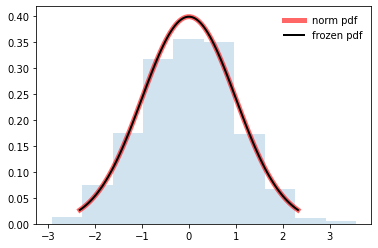

In [63]:
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1)
#
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

#
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#
r = norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)

plt.show()

In [52]:
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

True

Checking $\Phi(0)=0.5$

In [53]:

print(norm.cdf(0))

0.5


The 5% two-sided critical value is
$$
\Phi^{-1}(1.96) = 0.975
$$

In [54]:
print(norm.ppf(0.975))

1.959963984540054


Check the survival function
$$
(1 - \Phi(x))
$$
It must be
$$
1 - \Phi(1.96) \approxeq 0.025
$$

In [55]:
print(norm.sf(1.96))

0.024997895148220435


The main methods for continuous random variables are:

*   rvs: Random Variates

*   pdf: Probability Density Function

*   cdf: Cumulative Distribution Function

*   sf: Survival Function (1-CDF)

*   ppf: Percent Point Function (Inverse of CDF)

*   isf: Inverse Survival Function (Inverse of SF)

*   stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis

*   moment: non-central moments of the distribution

In [57]:
mu, sigma = 0, 0.1
np.random.seed(123456)
X = np.random.normal(mu, sigma, 1000)

In [60]:
from scipy import stats
print(stats.describe(X))
sum_X = stats.describe(X)
print(type(sum_X))
for i in sum_X:
  print(i)

DescribeResult(nobs=1000, minmax=(-0.35208760732312594, 0.3357427049452916), mean=-0.004604424576460095, variance=0.010901160995322198, skewness=-0.13339588401033087, kurtosis=-0.03957826084172256)
<class 'scipy.stats.stats.DescribeResult'>
1000
(-0.35208760732312594, 0.3357427049452916)
-0.004604424576460095
0.010901160995322198
-0.13339588401033087
-0.03957826084172256


The result is a tuple. We can save each result:

In [61]:
N, minmax, x_mean, x_variance, x_skewness, x_kurtosis = stats.describe(X)
print(f"The mean is {x_mean}")
print(f"The variance is {x_variance}")
print(f"The standard deviation is {np.sqrt(x_variance)}")

The mean is -0.004604424576460095
The variance is 0.010901160995322198
The standard deviation is 0.10440862510023871


## Hypothesis tests

We can use the t-test to test whether the mean of our sample differs in a statistically significant way from the theoretical expectation.

The hypothesis test for the mean to be different from zero is based on the statistic
$$
\dfrac{\bar{x} - \mu}{s_x}
$$
When we test
$$
H_0 \colon \mu=0 \qquad vs. \qquad H_1 \colon \mu \neq 0
$$
the statistic is
$$
\dfrac{\bar{x}}{s_{\bar{x}}} = \dfrac{\bar{x}}{s_x/\sqrt{N}}
$$
With Scipy:

In [66]:
stats.ttest_1samp(X, 0.0)

Ttest_1sampResult(statistic=-1.3945657230991275, pvalue=0.16345686127925294)

Let's do it ourselves:

In [68]:
xbar = X.mean()
sz = X.std()/np.sqrt(len(X))
my_tratio = xbar/sz
print(xbar)
print(sz)
print(my_tratio)

-0.004604424576460095
0.003300039368602574
-1.3952635293590065


How about the p-value?
Applying the normal approximation:

In [70]:
p = 2* np.minimum(norm.cdf(my_tratio), norm.sf(my_tratio))
print(p)

0.16293638565244783


# Numpy-Financial

There is a sub-module for financial function is Numpy. It is called num_financial (see [here](https://numpy.org/numpy-financial/)). It is not installed by default on Google Colab, so we are using the functions that are included in Numpy. Notice that these functions are deprecated and will be eventually removed from Numpy.

In [ ]:
#import numpy_financial as npf

### Simple Financial Functions

The documentation for the simple financial functions in Numpy is [here](https://numpy.org/doc/stable/reference/routines.financial.html)

| Function |   |
|------|------|
|fv(rate, nper, pmt, pv[, when]) | Compute the future value.|
|pv(rate, nper, pmt[, fv, when]) | Compute the present value.|
| npv(rate, values) | Returns the NPV (Net Present Value) of a cash flow series.|
|pmt(rate, nper, pv[, fv, when]) | Compute the payment against loan principal plus interest. |
|ppmt(rate, per, nper, pv[, fv, when]) | Compute the payment against loan principal.|
| ipmt(rate, per, nper, pv[, fv, when]) | Compute the interest portion of a payment. |
| irr(values) | Return the Internal Rate of Return (IRR).| 
|mirr(values, finance_rate, reinvest_rate) | Modified internal rate of return.|
| nper(rate, pmt, pv[, fv, when]) | Compute the number of periodic payments.|
| rate(nper, pmt, pv, fv[, when, guess, tol, …]) | Compute the rate of interest per period.|



## fFn

Project ffn is an intersting module for people working in the stock market. It is not installed on Colab, but you can find some material on its website [here](https://pmorissette.github.io/ffn/index.html) 

In [ ]:
#import ffn

# Financial Application

## Time Value of Money

50 &euro; today, interest rate es $r=3\%$. The value next period is
$$
50(1+0.03) = 1.03 
$$
1.03 &euro;

The value in 5 years will be
$$
50(1+0.03)^5 = 57.9637
$$
The value must 57.9637 &euro;. So far so good.

If we use Python:

In [ ]:

np.fv(0.03, 5, 0,-50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  


57.963703715

Notice that the first argument is the interest rate, the second one is the number of periods, and the third one is the payments (*pmt*) we make during these five 5 years (0). The final argument is **negative**. Why? By convention, it is a negative capital flow (you are receiving money).

In [ ]:
np.pv(0.03, 5, 0, -57.963)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  """Entry point for launching an IPython kernel.


49.9993929692593

## A First Loan

Let's assume that you have a loan with the following characteristics:

* Payment at time 0: 10000 &euro;
* Maturity: 5 years;
* Annual interest rate: 4%

You receive a quantity $L$ at period 0. When you value it at period 5, it will be

In [ ]:
L0 = 10000
irate = 0.04
rate = 1 + irate
p=5
L_finalvalue = L0*(rate**p)
print(L_finalvalue)

12166.529024000001


Checking

In [ ]:
np.fv(0.04, 5, 0, -10000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  """Entry point for launching an IPython kernel.


12166.529024000001

Now, lets have a look at the payments you are to make. You have to pay from year 1 to year 5 the same amount, lets call it $P$. The scheme is as follows

| Period|  Payment| 
|--:|--:|
|  0|  0|  
|  1|  P|  
| 2 | P |
| 3 | P |
| 4 | P |
| 5 | P |

This is what we call the **French method** to amortize a loan.

We have already found the final vaue of the loan

In [ ]:
print(L_finalvalue)

12166.529024000001


The final value of the payments is 
$$
P \left[ 1 + (1+r) + (1+r)^2 + \ldots (1+r)^4 \right]
$$

Let's play a bit to find
$$
1 + (1+r) + (1+r)^2 + \ldots (1+r)^4
$$

In [ ]:
[rate**i for i in range(0,5)]

[1.0, 1.04, 1.0816000000000001, 1.124864, 1.1698585600000002]

In [ ]:
s_array = np.array([rate**i for i in range(0,5)])
print(s_array)
print(type(s_array))

[1.         1.04       1.0816     1.124864   1.16985856]
<class 'numpy.ndarray'>


In [ ]:
S = s_array.sum()
print(S)

5.416322559999999


And, obviously, it must be
$$
L_f = P \times S
$$
so that
$$
P = \dfrac{L_f}{S}
$$

In [ ]:
P = L_finalvalue/S
print(P)

2246.2711349303395


What is the payment $P$ that we have to make?

**Monthly instalment** is calculated based on the following formula assuming constant payment and constant interest rate. It is the same formula used in PMT function in MS Excel.

`PMT = (rate*(fv+pv*(1+ rate)^nper))/((1+rate*type)*(1-(1+ rate)^nper))`

Here rate refers to interest rate per month (if monthly instalment). nper means number of payments for loan. pv refers to loan amount. fv refers to future value after the full loan is repaid. It is generally zero. type=0 means payments are due at the end of the period. type = 1 means payments are due at the beginning of the period.

In [ ]:
np.pmt(0.04, 5, pv=L0, fv=0, when='end')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  """Entry point for launching an IPython kernel.


-2246.271134930338

Notice that `fv=0` and `when='end'` are **default arguments**

So, we agree that we have to pay 2246.271134930338 every year (1 to 5). But, what part corresponds to principal and which to interest?

**Interest portion of monthly instalment** can be easily calculated using IPMT function in MS Excel. Calculation behind this function is dependent on PMT function.

`IPMT = -( ((1+rate)^(per-1)) * (pv*rate + PMT(rate, nper,pv, fv=0, type=0)) - PMT(rate, nper,pv, fv=0, type=0))`

Here per means nth period. 

In Excel, PPMT function returns **principal portion of instalment**. It is the difference between instalment amount and interest amount.

`PPMT = PMT(rate, nper,pv, fv=0, type=0) - IPMT(rate, per, nper, pv, fv=0, type=0)`

Let's have a look to our first year:

In [ ]:
# First period

per = 1

# Interest payment

ipmt = np.ipmt(irate, per, 5, L0)

## Principal payment

ppmt = np.ppmt(irate, per, 5, L0)

print(ipmt, ppmt)

print(ipmt + ppmt)

-400.0 -1846.2711349303381
-2246.271134930338


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: numpy.ipmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.ipmt instead (https://pypi.org/project/numpy-financial/).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: numpy.ppmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.ppmt instead (https://pypi.org/project/numpy-financial/).
  # This is added back by InteractiveShellApp.init_path()


So we can make the **amortization table**

In [ ]:
iPayments =[np.ipmt(irate, per, 5, L0) for per in range(1,6)]
pPayments = [np.ppmt(irate, per, 5, L0) for per in range(1,6)]
for per in range(0,5):
  print(per+1 , iPayments[per], pPayments[per], iPayments[per] + pPayments[per])

1 -400.0 -1846.2711349303381 -2246.271134930338
2 -326.1491546027864 -1920.1219803275517 -2246.271134930338
3 -249.34427538968424 -1996.9268595406538 -2246.271134930338
4 -169.4672010080581 -2076.80393392228 -2246.271134930338
5 -86.3950436511667 -2159.8760912791713 -2246.271134930338


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: numpy.ipmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.ipmt instead (https://pypi.org/project/numpy-financial/).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: numpy.ppmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.ppmt instead (https://pypi.org/project/numpy-financial/).
  


How about building a **DataFrame**?

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns=['Total Payment', 'Interest Payment', 'Principal Payment'], dtype='float')
df['Interest Payment'] = -np.array(iPayments)
df['Principal Payment'] = -np.array(pPayments) 
df['Total Payment'] = df['Interest Payment'] + df['Principal Payment']
df.index=range(1,6)
df.index.name="Period"
print(df)

        Total Payment  Interest Payment  Principal Payment
Period                                                    
1         2246.271135        400.000000        1846.271135
2         2246.271135        326.149155        1920.121980
3         2246.271135        249.344275        1996.926860
4         2246.271135        169.467201        2076.803934
5         2246.271135         86.395044        2159.876091
